O **Airbnb** é uma plataforma online com o propósito de permitir o aluguel temporário de acomodações todo mundo. Fundada em 2008 por Brian Chesky, Joe Gebbia e Nathan Blecharczyk, a empresa reformulou o turismo ao permitir que seus convidados (guests) alugassem espaços de afitriões (hosts) interessados em gerar renda através do aluguél temporário. Essa prática baseada em confiança está presente em mais de 220 países, contando com 5 milhões de afitriões que já receberam mais de 2 bilhões de hóspedes, conforme divulgado pela empresa em seu [site](https://news.airbnb.com/about-us/). 

Além de oferecer os serviços de hospedagem, indiretamente a empresa é responsável pela movimentação da economia local, beneficiando pequenos e grandes empreendedores através das experiências vivenciadas pelos viajantes que se interessam pela cultura e gastronomia local. A movimentação de dinheiro circulando por conta dos turistas contribui para a geração de empregos, novos negócios e investimentos. Em toda a história, estima-se um registro em torno de 250 bilhões de dólares obtidos pelos hosts.  

Este projeto visa analisar os dados do Airbnb de New York do ano de 2019, com o intuito de identificar os fatores que influenciam na quantidade de reservas diárias, o que podemos aprender com as diferentes áreas da cidade, os diferentes hosts, os preços, reviews etc. Também iremos descobrir se existem áreas com mais movimentações do que outras, quais são elas e se há razão para essas áreas serem mais movimentadas.

In [1]:
import markdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_rows", 674)

In [2]:
df = pd.read_csv("AB_NYC_2019.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

- As colunas com o tipo de dados `object` será alterado para `category` a fim de otimizar o dataset.
- As colunas numéricas receberão otimização em seus tipos para poupar a alocação de memória.
- Possuímos valores ausentes nas colunas name, host_name, last_review e reviews_per_month. 

In [4]:
df["name"] = df["name"].astype(pd.CategoricalDtype())
df["neighbourhood"] = df["neighbourhood"].astype(pd.CategoricalDtype())
df["neighbourhood_group"] = df["neighbourhood_group"].astype(pd.CategoricalDtype())
df["room_type"] = df["room_type"].astype(pd.CategoricalDtype())
df["last_review"] = df["last_review"].astype(pd.CategoricalDtype())

In [5]:
df["minimum_nights"] = pd.to_numeric(arg=df["minimum_nights"], downcast="integer")

df["latitude"] = pd.to_numeric(arg=df["latitude"], downcast="float")
df["longitude"] = pd.to_numeric(arg=df["longitude"], downcast="float")
df["reviews_per_month"] = pd.to_numeric(arg=df["reviews_per_month"], downcast="float")

df["id"] = pd.to_numeric(arg=df["id"], downcast="float")
df["host_id"] = pd.to_numeric(arg=df["host_id"], downcast="float")
df["price"] = pd.to_numeric(arg=df["price"], downcast="float")
df["minimum_nights"] = pd.to_numeric(arg=df["minimum_nights"], downcast="float")
df["number_of_reviews"] = pd.to_numeric(arg=df["number_of_reviews"], downcast="float")
df["calculated_host_listings_count"] = pd.to_numeric(arg=df["calculated_host_listings_count"], downcast="float")
df["availability_365"] = pd.to_numeric(arg=df["availability_365"], downcast="float")

In [6]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Columns: 16 entries, id to availability_365
dtypes: category(5), float32(7), float64(2), int16(1), object(1)
memory usage: 4.4+ MB


In [7]:
display(f"Neighbourhood: {df['neighbourhood'].unique()}")

"Neighbourhood: ['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem', ..., 'Bull's Head', 'New Dorp', 'Rossville', 'Breezy Point', 'Willowbrook']\nLength: 221\nCategories (221, object): ['Allerton', 'Arden Heights', 'Arrochar', 'Arverne', ..., 'Woodhaven', 'Woodlawn', 'Woodrow', 'Woodside']"

In [8]:
display(f"Neighbourhood Groups: {df['neighbourhood_group'].unique()}")

"Neighbourhood Groups: ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']\nCategories (5, object): ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']"

In [9]:
display(f"Room Type: {df['room_type'].unique()}")

"Room Type: ['Private room', 'Entire home/apt', 'Shared room']\nCategories (3, object): ['Entire home/apt', 'Private room', 'Shared room']"

In [10]:
display(f"Minimum Nights: {df['minimum_nights'].unique()}")

'Minimum Nights: [   1    3   10   45    2    5    4   90    7   14   60   29   30  180\n    9   31    6   15    8   26   28  200   50   17   21   11   25   13\n   35   27   18   20   40   44   65   55  120  365  122   19  240   88\n  115  150  370   16   80  181  265  300   59  185  360   56   12   70\n   39   24   32 1000  110  270   22   75  250   62   23 1250  364   74\n  198  100  500   43   91  480   53   99  160   47  999  186  366   68\n   93   87  183  299  175   98  133  354   42   33   37  225  400  105\n  184  153  134  222   58  210  275  182  114   85   36]'

In [11]:
print(f"Valor intervalo dos valores dos aluguéis: [{df['price'].min()}, {df['price'].max()}]")

Valor intervalo dos valores dos aluguéis: [0.0, 10000.0]


# Exploratory Data Analysis

## Exploração das variáveis (features)

Primeiramente vamos observar individualmente, cada variável do conjunto de dados. Dessa forma, poderemos entender:
- Como os dados são distribuídos?
- Qual a frequência relativa das observações?
- Quais os valores mais comuns?
- Os dados são simétricos ou assimétricos?
- São dispersos ou homogêneos?

### Neighbourhood Groups  

#### Distribuições de frequências

In [12]:
def neighbourhood_group_categorical_distribution(df: pd.DataFrame) -> None:

    df_distribution = df.copy()

    frequency_distribution = df_distribution['neighbourhood_group'].value_counts(sort=True)
    relative_frequency = frequency_distribution / frequency_distribution.sum()
    cumulative_frequency = relative_frequency.cumsum()

    df_distribution = pd.DataFrame({
        'Frequency': frequency_distribution,
        'Relative Frequency': relative_frequency,
        'Cumulative Frequency': cumulative_frequency
    })

    display(df_distribution)
neighbourhood_group_categorical_distribution(df)

,Frequency,Relative Frequency,Cumulative Frequency
neighbourhood_group,,,
Manhattan,21661,0.443011,0.443011
Brooklyn,20104,0.411167,0.854177
Queens,5666,0.115881,0.970058
Bronx,1091,0.022313,0.992371
Staten Island,373,0.007629,1.000000


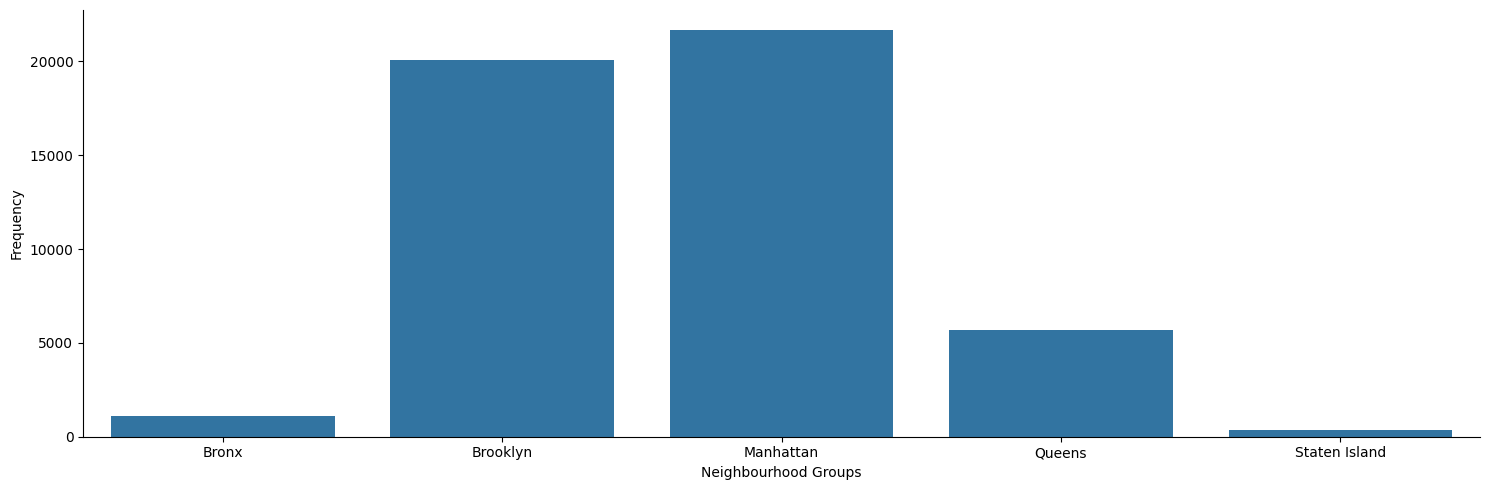

In [39]:
fig, axs = plt.subplots(1, 1, figsize=(15, 5))
neighbourhood_group = df["neighbourhood_group"].value_counts().reset_index()
sns.barplot(data=neighbourhood_group, x="neighbourhood_group", y="count", ax=axs)
axs.set_ylabel("Frequency")
axs.set_xlabel("Neighbourhood Groups")

plt.tight_layout()
sns.despine()
plt.show()

Os dados mostram que mais da metade (85%) ofertas de hospedagem estão localizadas em Manhattan e Brooklyn.

### Neighbourhood

#### Distribuições de frequências

In [13]:
def neighbourhood_categorical_distribution(df: pd.DataFrame) -> None:

    df_distribution = df.copy()

    frequency_distribution = df_distribution['neighbourhood'].value_counts(sort=True)
    relative_frequency = frequency_distribution / frequency_distribution.sum()
    cumulative_frequency = relative_frequency.cumsum()

    df_distribution = pd.DataFrame({
        'Frequency': frequency_distribution,
        'Relative Frequency': relative_frequency,
        'Cumulative Frequency': cumulative_frequency
    })

    display(df_distribution)
neighbourhood_categorical_distribution(df)

,Frequency,Relative Frequency,Cumulative Frequency
neighbourhood,,,
Williamsburg,3920,0.080172,0.080172
Bedford-Stuyvesant,3714,0.075959,0.156130
Harlem,2658,0.054361,0.210492
Bushwick,2465,0.050414,0.260906
Upper West Side,1971,0.040311,0.301217
Hell's Kitchen,1958,0.040045,0.341262
East Village,1853,0.037898,0.379159
Upper East Side,1798,0.036773,0.415932
Crown Heights,1564,0.031987,0.447919


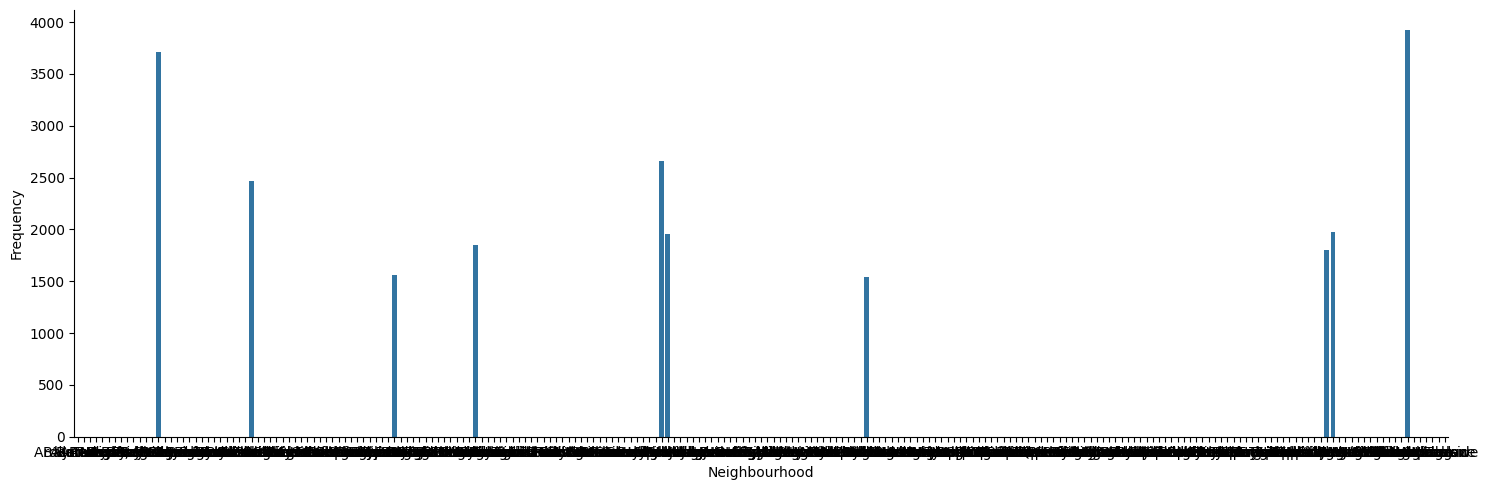

In [12]:
fig, axs = plt.subplots(1, 1, figsize=(15, 5))
neighbourhood = df["neighbourhood"].value_counts(ascending=False).reset_index().head(10)
sns.barplot(data=neighbourhood, x="neighbourhood", y="count", ax=axs)
axs.set_ylabel("Frequency")
axs.set_xlabel("Neighbourhood")

plt.tight_layout()
sns.despine()
plt.show()

Os dados mostram que "Williamsburg", "Bedford-Stuyvesant" e "Harlem" são sub-bairros de acomodações mais comuns no Airbnb de Nova York.

### Room Type

#### Distribuições de frequências

In [14]:
def room_type_categorical_distribution(df: pd.DataFrame) -> None:

    df_distribution = df.copy()

    frequency_distribution = df_distribution['room_type'].value_counts(sort=True)
    relative_frequency = frequency_distribution / frequency_distribution.sum()
    cumulative_frequency = relative_frequency.cumsum()

    df_distribution = pd.DataFrame({
        'Frequency': frequency_distribution,
        'Relative Frequency': relative_frequency,
        'Cumulative Frequency': cumulative_frequency
    })

    display(df_distribution)
room_type_categorical_distribution(df)

,Frequency,Relative Frequency,Cumulative Frequency
room_type,,,
Entire home/apt,25409,0.519665,0.519665
Private room,22326,0.456611,0.976276
Shared room,1160,0.023724,1.000000


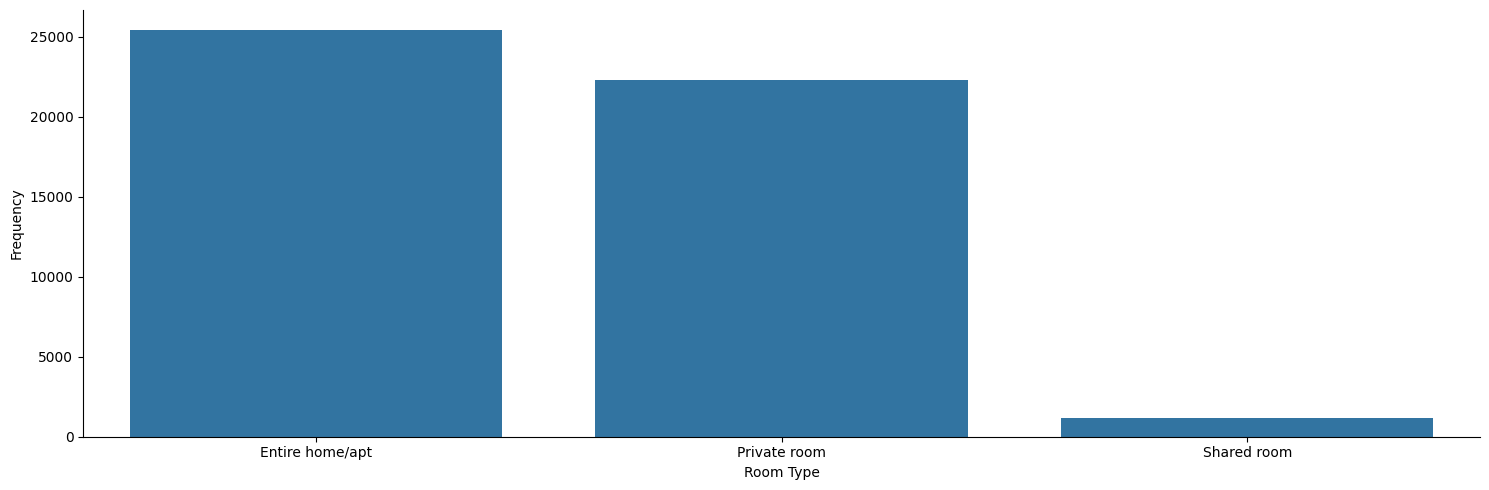

In [52]:
fig, axs = plt.subplots(1, 1, figsize=(15, 5))

room_type = df["room_type"].value_counts().reset_index()
sns.barplot(data=room_type, x="room_type", y="count", ax=axs)
axs.set_ylabel("Frequency")
axs.set_xlabel("Room Type")

plt.tight_layout()
sns.despine()
plt.show()

Os dados mostram que "Entire home/apt" e "Private room" são os tipos de acomodações mais comuns no Airbnb de Nova York. A baixa oferta de "Shared room" pode sugerir uma preferência dos clientes por mais privacidade, o que faz sentido considerando fatores como viagens longas, conforto pessoal e estadias em família.

No entanto, essa é uma inferência baseada na intuição. Para validar se essa diferença é estatisticamente significativa e pode ser generalizada para a população, devemos aplicar um teste de hipótese.

Para isso, executarei um teste de hipótese para verificar há diferenças estatisticamente significativas entre as médias dos grupos de tipos de acomodações usando o One-Way ANOVA, caso os pressupostos forem atendidos, ou o Kruskal-Wallis caso os pressupostos da ANOVA não forem atendidos.

A distribuição de frequência é uma ferramenta essencial em análises exploratórias porque permitem obter informações valiosas a cerca dos dados que estamos trabalhando de forma simples. Com as três distribuições de frequência acima, conseguimos concluir que a frequência e a porcentagem que representam as três categorias mais frequentes em **neighbourhood_group**, **neighbourhood** e **room_type** são:

### Number of Reviews

In [54]:
def nreviews_categorical_distribution(df: pd.DataFrame) -> None:

    df_distribution = df.copy()

    frequency_distribution = df_distribution['number_of_reviews'].value_counts(sort=True)
    relative_frequency = frequency_distribution / frequency_distribution.sum()
    cumulative_frequency = relative_frequency.cumsum()

    df_distribution = pd.DataFrame({
        'Frequency': frequency_distribution,
        'Relative Frequency': relative_frequency,
        'Cumulative Frequency': cumulative_frequency
    })

    display(df_distribution)
nreviews_categorical_distribution(df)

,Frequency,Relative Frequency,Cumulative Frequency
number_of_reviews,,,
0.0,10052,0.205583,0.205583
1.0,5244,0.107250,0.312834
2.0,3465,0.070866,0.383700
3.0,2520,0.051539,0.435239
4.0,1994,0.040781,0.476020
5.0,1618,0.033091,0.509111
6.0,1357,0.027753,0.536865
7.0,1179,0.024113,0.560978
8.0,1127,0.023049,0.584027


Os dados mostram que 10052 (21%) das acomodações não possuem reviews. Além disso, 30323 (62%) das acomodações possuem até 10 reviews.  

Os reviews são características importantes em produtos ou serviços de e-commercers. As críticas impostas nos produtos abrem margem para identificar a opinião do consumidor sobre os aspectos positivos e negativos a cerca do produto. Disponibilizar um feedback sobre um produto ou serviço é também uma forma de tornar evidente as suas impressões sobre, servindo como uma propaganda boca a boca: um consumidor conta ao outro a sua experiência com determinado artigo e recomenda, ou não, a compra.  

De acordo com a pesquisa "Importance of Online Product Reviews from a Consumer’s Perspective"  

- 85% dos consumidores analisaram, com frequência, avaliações de outras pessoas na internet antes de realizar uma compra;  
- 83% desses consumidores conferem tanto os comentários positivos quanto os negativos antes de decidir a compra;   
- 11% dos participantes afirmaram que uma única revisão negativa foi razão suficiente para desistirem de comprar um produto;    
- 18% afirmaram que uma única avaliação positiva já foi motivo para comprarem um produto.  

As razões pelas quais os números de reviews é baixa podem ser causadas por:  
1. Falta de incentivo do anfitrião para o hóspede;  
2. Falta de incentivo do Airbnb para o hóspede;  
3. Falta de incentivo do Airbnb para o hóspede.  
4. O hóspede não se interessa apresentar uma review.  

Possivelmente existem outras razões para isos acontecer, mas destaco essas 4 como as principais. Independente disso, podemos oferencer as seguintes estratégias:  

1️⃣ Como o anfitrião pode incentivar o cliente a deixar um feedback?  

É interessante que o hóspede sinta-se convidado naturalmetne para oferecer a review.  

1. A experiência deve ser memorável    
    Uma boa estadia pode ser um impulsionador. Pequenos gestos, como um bilhete de boas-vindas ou dicas personalizadas sobre a cidade, podem aumentar a satisfação. Melhor ainda se uma pequena e breve pesquisa de satisfação puder ocorrer antes da estadia para que o anfitrião gere uma experiência personalizada.  
2. Não perder o timing de solicitar o check-out  
    O momento ideal para pedir um feedback é logo após o check-out.  
    Por exemplo:  
        "Espero que tenha tido uma ótima estadia! Seu feedback é muito importante para mim e para futuros hóspedes. Se puder compartilhar sua experiência, ficaria muito grato!"  
    Melhor ainda se a mensagem gerar impácto, como: "Mais de 50 hóspedes já avaliaram este imóvel! Sua opinião também faz a diferença."  

2️⃣ Como o Airbnb pode incentivar os hóspedes a darem feedback?  

A empresa pode melhorar a experiência do cliente até o feedback.  

1. Tornar o processo fácil e rápido  
    Criar botões de resposta rápida (exemplo: “A estadia foi ótima! 👍” ou “Houve problemas 😕”) e (ou) sugerir  frases automáticas para feedback. É uma boa oportunidade para aplicar respostas geradas por IA Generativa.  
2. Processo de Gamificação  
    Criar um ranking de hóspedes mais engajados.  
    Oferecer pequenos benefícios para quem avalia frequentemente (como um selo no perfil ou prioridade para reservas futuras).  
3. Ajudar a criar um senso de apoio a outros hóspedes  
    Exibir mensagens como:  
        "Sua avaliação ajudará o próximo hóspede a tomar uma boa decisão!"  
    Mostrar estatísticas como:  
        "95% dos hóspedes que leram avaliações tomaram decisões melhores."  

3️⃣ Como o Airbnb pode incentivar os anfitriões a buscarem feedbacks dos clientes?   

Se nem todos anfitriões percebem a importância das avaliações ou dão a devida importância, o Airbnb pode mudar isso através de incentivos, ferramentas e benefícios diretos.  

1. Criar um sistema de "Reputação de Anfitrião"  
    Destacar anfitriões que possuem altas taxas de feedbacks dos hóspedes.  
    Criar um selo de "Anfitrião Engajado" para quem solicita avaliações frequentemente e tem boas respostas.   
    Criar algoritmos que sugiram acomodações de anfitriões destaque.  
    Por exemplo:  
        "Parabéns! 90% dos seus hóspedes deixam avaliações. Seu anúncio será priorizado nas buscas."  

2.  Dar recompensas por avaliações recebidas  
    Criar benefícios diretos para anfitriões que recebem muitos feedbacks.  
    Exemplos de recompensas:  
        Maior destaque no algoritmo de busca.  
        Taxas de serviço reduzidas após um certo número de feedbacks.  
        Acesso antecipado a novas ferramentas da plataforma.  

3. Automatizar lembretes para os anfitriões
    O Airbnb pode enviar alertas automáticos sugerindo que o anfitrião peça avaliações.  
    Exemplo de notificação:  
    "Seu hóspede acabou de fazer check-out! Envie uma mensagem pedindo feedback e aumente suas chances de novas reservas."  


In [58]:
803+964+1127+1179+1357+1618+1994+2520+3465+5244+10052

30323

### Minimum Nights

#### Estatísticas

In [25]:
df["minimum_nights"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
minimum_nights,48895.0,7.029962,20.51055,1.0,1.0,3.0,5.0,1250.0


In [26]:
(df["minimum_nights"].std()/df["minimum_nights"].mean())*100

np.float64(291.7590316308817)

**Medidas separatrizes**
Q1 (25%): 25% das reservas exigem no máximo 1 noite mínima.  
Q2 (50%) - Mediana: 50% das reservas exigem até 3 noites mínimas, enquanto os outros 50% exigem mais de 3 noites.  
Q3 (75%): 75% das reservas exigem até 5 noites mínimas, enquanto 25% exigem mais de 5 noites.  

**Coeficiente de Variação**
- Um CV alto (> 100%) sugere que os valores da variável *minimum_nights* são muito variáveis e podem conter outliers (valores extremos). Observando o valor máximo na descrição estatística acima, podemos suspeitar que esse valor é um outlier. Porém, precisamos visualizar os dados por outra ótica.  
- **A média pode não representar bem a distribuição**, pois a grande variação indica que há reservas com exigências de noites mínimas muito diferentes entre si.


#### Distribuições de frequências

In [27]:
def minimum_nights_discrete_distribution(df: pd.DataFrame) -> pd.DataFrame:
    
    df_distribution = df.copy()
    
    frequency_distribution = df['minimum_nights'].value_counts(sort=True)
    relative_frequency = frequency_distribution / frequency_distribution.sum()
    cumulative_frequency = relative_frequency.cumsum()

    df_distribution = pd.DataFrame({
        'Frequency': frequency_distribution,
        'Relative Frequency': relative_frequency,
        'Cumulative Frequency': cumulative_frequency
    })

    display(df_distribution)
minimum_nights_discrete_distribution(df)

,Frequency,Relative Frequency,Cumulative Frequency
minimum_nights,,,
1,12720,0.260149,0.260149
2,11696,0.239206,0.499356
3,7999,0.163595,0.662951
30,3760,0.076899,0.739851
4,3303,0.067553,0.807404
5,3034,0.062051,0.869455
7,2058,0.042090,0.911545
6,752,0.015380,0.926925
14,562,0.011494,0.938419


Usando a distribuição de frequências, nos podemos observar que 66% das reservas possuem a quantidade mínima de 1 até 3 noites. Podemos transformar essa variável em contínua para observar a distribuição de frequências contínua. Diferente da distribuição de frequências para variáveis discretas, no caso das variáveis contínuas usamos o conceito de classes e intervalos, onde a quantidade de classes pode ser obtida com algumas regras estatísticas e os intervalos através da amplitude intervalar - a razão entre a amplitude dos elementos elementos e a quantidade de classes. Aplicarei a regra de Sturges para obter a quantidade de classes.

In [28]:
def sturges_rule(data: pd.DataFrame, series: str) -> float:
        return 1 + ((10/3) * np.log10(len(data)))

In [29]:
def interval_amplitude(df: pd.DataFrame, series: str) -> float:
    amplitude = df[series].max() - df[series].min()
    amplitude_intervalar = amplitude/sturges_rule(df, series).round(0)
    
    return amplitude_intervalar.round(3)

sturges_rule(df, "minimum_nights").round(0), interval_amplitude(df, "minimum_nights")

(np.float64(17.0), np.float64(73.471))

In [30]:
def minimum_nights_countinuous_distribution(df: pd.DataFrame) -> pd.DataFrame:

    df_distribution = df.copy()
    
    index_sturges_rule = [  
        '      1  |—|  73,471', 
        ' 73,471   —|  146,942', 
        ' 146,942  —|  220,413', 
        ' 220,413  —|  293,884', 
        ' 293,884  —|  367,355', 
        ' 367,355  —|  440,826', 
        ' 440,826  —| 514,297', 
        ' 514,297  —| 587,768', 
        ' 587,768  —| 661,239', 
        ' 661,239  —| 734,710', 
        ' 734,710  —| 808,181', 
        ' 808,181  —| 881,652', 
        ' 881,652  —| 955,123', 
        ' 955,123  —| 1028,594', 
        ' 1028,594 —| 1102,065', 
        ' 1102,065 —| 1175,536', 
        ' 1175,536 —| 1250'
    ]
    
    bins = np.cumsum([1, 73.470, 73.470, 73.470, 73.470, 73.470, 73.470, 73.470, 73.470, 73.470, 73.470, 73.470, 73.470, 73.470, 73.470, 73.470, 73.470, 73.470])
    
    df_distribution['Bins'] = pd.cut(df['minimum_nights'], bins=bins, right=False, labels=index_sturges_rule)
    
    frequency_distribution = df_distribution['Bins'].value_counts().sort_index()
    relative_frequency = frequency_distribution / frequency_distribution.sum()
    cumulative_frequency = relative_frequency.cumsum()

    df_distribution = pd.DataFrame({
        'Frequency': frequency_distribution,
        'Relative Frequency': relative_frequency,
        'Cumulative Frequency': cumulative_frequency
    })

    display(df_distribution)

In [31]:
minimum_nights_countinuous_distribution(df)

,Frequency,Relative Frequency,Cumulative Frequency
Bins,,,
"1 |—| 73,471",48577,0.993517,0.993517
"73,471 —| 146,942",184,0.003763,0.997280
"146,942 —| 220,413",67,0.001370,0.998650
"220,413 —| 293,884",10,0.000205,0.998855
"293,884 —| 367,355",44,0.000900,0.999755
"367,355 —| 440,826",2,0.000041,0.999795
"440,826 —| 514,297",6,0.000123,0.999918
"514,297 —| 587,768",0,0.000000,0.999918
"587,768 —| 661,239",0,0.000000,0.999918


In [32]:
df["minimum_nights"] = pd.to_numeric(arg=df["minimum_nights"], downcast="integer")

Com a tabela de frequência para variáveis contínuas e o uso da Regra de Sturges para identificar as k classes, podemos ver que 48.576 (99.35%) são compostas por reservas feitas no Airbnb para um número mínimo de noites entre 1 e 73.47 (~74). Essa informação é útil porque permite estabelecer uma fronteira entre os casos comuns e casos extremos dentro da nossa amostra, auxiliando na interpretação de outras medidas que podemos usar em nossa amostra.

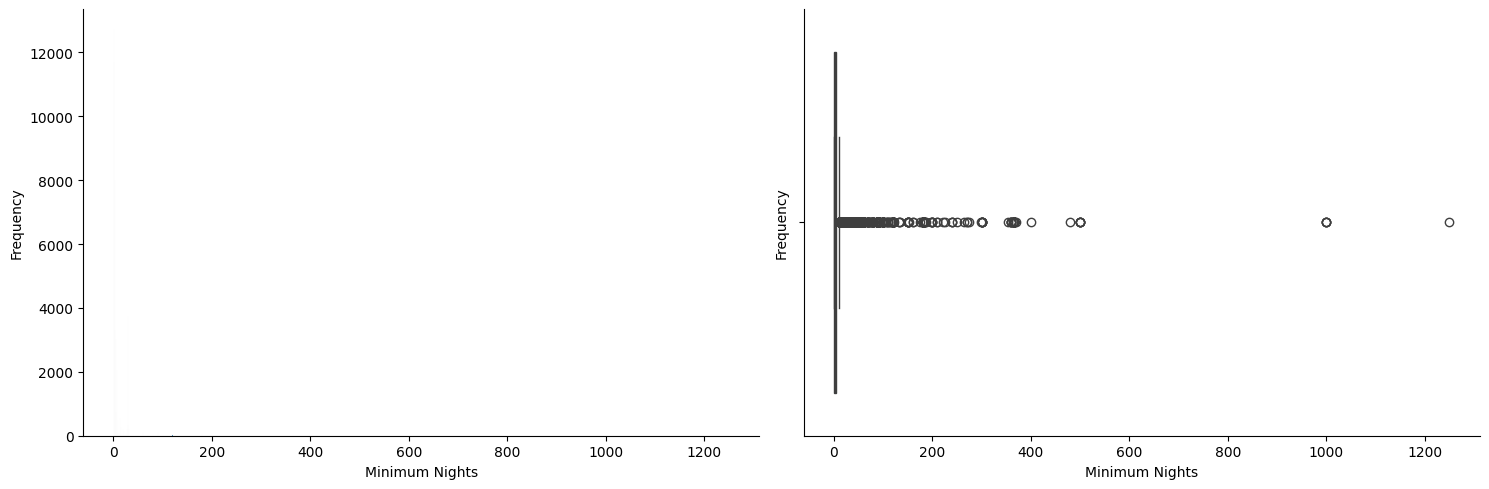

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=df, x="minimum_nights", ax=axs[0])
axs[0].set_ylabel("Frequency")
axs[0].set_xlabel("Minimum Nights")

sns.boxplot(data=df, x="minimum_nights", ax=axs[1])
axs[1].set_ylabel("Frequency")
axs[1].set_xlabel("Minimum Nights")

plt.tight_layout()
sns.despine()
plt.show()

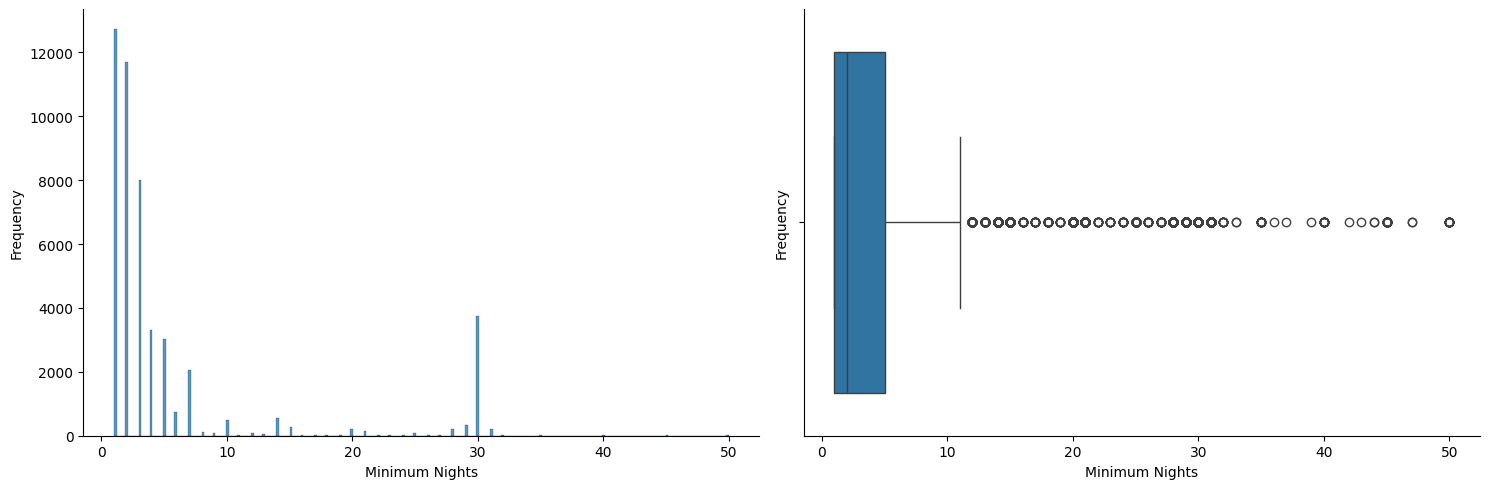

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=df.loc[df["minimum_nights"]<=50], x="minimum_nights", ax=axs[0])
axs[0].set_ylabel("Frequency")
axs[0].set_xlabel("Minimum Nights")

sns.boxplot(data=df.loc[df["minimum_nights"]<=50], x="minimum_nights", ax=axs[1])
axs[1].set_ylabel("Frequency")
axs[1].set_xlabel("Minimum Nights")

plt.tight_layout()
sns.despine()
plt.show()

O primeiro gráfico mostra claramente como existe uma grande discrepência nos dados de noites mínimas. Posteriormente vendo o segundo gráfico, com a quantidade de noites mínimas reduzidas, fica clara a presença de uma assimetria positiva.

### Price

#### Estatísticas

In [35]:
df["price"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
price,48895.0,152.720688,240.15416,0.0,69.0,106.0,175.0,10000.0


In [36]:
(df["price"].std()/df["price"].mean())*100

np.float32(157.25056)

**Medidas separatrizes**
Q1 (25%): 25% das reservas possuem preço máximo de 69 dólares.  
Q2 (50%) - Mediana: 50% das reservas possuem preço de até 106 dólares, enquanto os outros 50% possuem preço maiores que 106 dólares.  
Q3 (75%): 75% das reservas possuem preço máximo de 175 dólares, enquanto 25% exigem mais que esse valor.

**Coeficiente de Variação**
- Um CV alto (> 100%) sugere que os valores da variável *price* são muito variáveis e podem conter outliers (valores extremos). Observando o valor máximo na descrição estatística acima, podemos suspeitar que esse valor é um outlier, o que não significa ser um ponto negativo, já que a cidade de New York possui regiões caríssimas. Porém, precisamos visualizar os dados por outra ótica.  
- **A média pode não representar bem a distribuição**, pois a grande variação indica que há preços muito diferentes entre si.

#### Distribuições de frequências

In [40]:
sturges_rule(df, "price").round(0), interval_amplitude(df, "price")

(np.float64(17.0), np.float64(588.235))

In [41]:
def price_countinuous_distribution(df: pd.DataFrame) -> pd.DataFrame:

    df_distribution = df.copy()
    
    index_sturges_rule = [  
        '       0  |—|  588,235', 
        '  588,235  —|  1176,47', 
        ' 1176,47   —|  1764,705', 
        ' 1764,705  —|  2352,94', 
        ' 2352,94   —|  2941,175', 
        ' 2941,175  —|  3529,410', 
        ' 3529,410  —|  4117,645', 
        ' 4117,645  —|  4705,880', 
        ' 4705,880  —|  5294,115', 
        ' 5294,115  —|  5882,350', 
        ' 5882,350  —|  6470,585', 
        ' 6470,585  —|  7058,882', 
        ' 7058,882  —|  7647,055', 
        ' 7647,055  —|  8235,290', 
        ' 8235,290  —|  8823,525', 
        ' 8823,525  —|  9411,76', 
        ' 9411.76   —|  10 000'
    ]
    
    bins = np.cumsum([0, 588.235, 588.235, 588.235, 588.235, 588.235, 588.235, 588.235, 588.235, 588.235, 588.235, 588.235, 588.235, 588.235, 588.235, 588.235, 588.235, 588.235])
    
    df_distribution['Bins'] = pd.cut(df['price'], bins=bins, right=False)
    
    frequency_distribution = df_distribution['Bins'].value_counts().sort_index()
    relative_frequency = frequency_distribution / frequency_distribution.sum()
    cumulative_frequency = relative_frequency.cumsum()

    df_distribution = pd.DataFrame({
        'Frequency': frequency_distribution,
        'Relative Frequency': relative_frequency,
        'Cumulative Frequency': cumulative_frequency
    })

    display(df_distribution)
price_countinuous_distribution(df)

,Frequency,Relative Frequency,Cumulative Frequency
Bins,,,
"[0.0, 588.235)",47994,0.981633,0.981633
"[588.235, 1176.47)",691,0.014133,0.995766
"[1176.47, 1764.705)",89,0.001820,0.997587
"[1764.705, 2352.94)",43,0.000879,0.998466
"[2352.94, 2941.175)",21,0.000430,0.998896
"[2941.175, 3529.41)",16,0.000327,0.999223
"[3529.41, 4117.645)",10,0.000205,0.999427
"[4117.645, 4705.88)",5,0.000102,0.999530
"[4705.88, 5294.115)",8,0.000164,0.999693


De todas as reservas, o total de **47994 (98.16%)** são compostas por reservas feitas no Airbnb para um número mínimo de noites entre **0 e 588.235 dólares (~588)**.

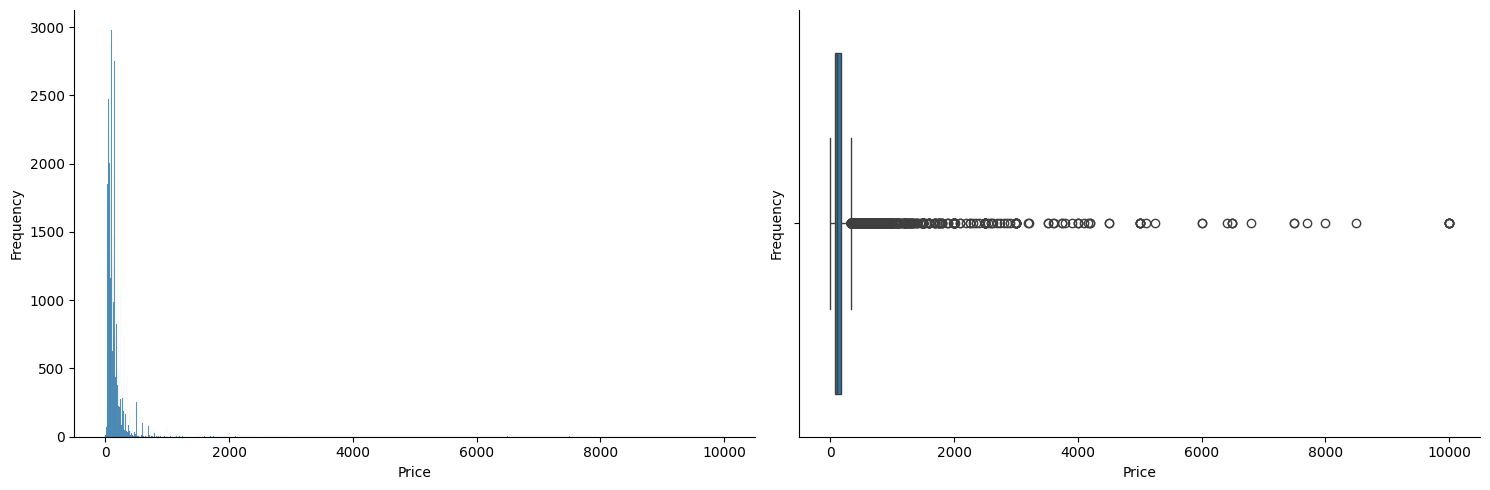

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=df, x="price", ax=axs[0])
axs[0].set_ylabel("Frequency")
axs[0].set_xlabel("Price")

sns.boxplot(data=df, x="price", ax=axs[1])
axs[1].set_ylabel("Frequency")
axs[1].set_xlabel("Price")

plt.tight_layout()
sns.despine()
plt.show()

Como já vimos na distribuição de frequências, os dados de preços estão concentrados, em maior número, no intervalo de valores de 0 até menos que 588 dólares. Os valores considerados "atípicos" estão após esse valor. Vamos dar um zoom no gráfico selecionando todos os valores maiores que 588 dólares.

Encontramos o mesmo comportamento em noites mínimas. A quantidade de noites mínimas mais frequentes estão entre 1 à 3.

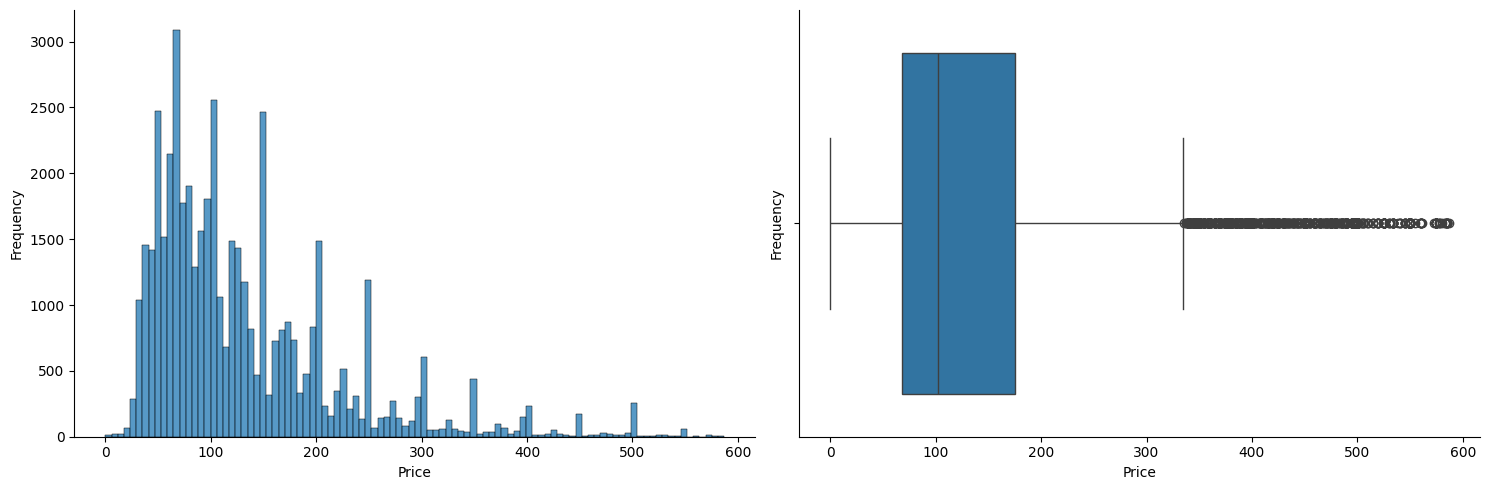

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=df.loc[df["price"]<=588], x="price", ax=axs[0])
axs[0].set_ylabel("Frequency")
axs[0].set_xlabel("Price")

sns.boxplot(data=df.loc[df["price"]<=588], x="price", ax=axs[1])
axs[1].set_ylabel("Frequency")
axs[1].set_xlabel("Price")

plt.tight_layout()
sns.despine()
plt.show()

#### Preço por Neighbourhood Groups

In [49]:
df.groupby("neighbourhood_group")["price"].sum()

C:\Users\SF50864\AppData\Local\Temp\ipykernel_19084\1945311093.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("neighbourhood_group")["price"].sum()


neighbourhood_group
Bronx              95459.0
Brooklyn         2500600.0
Manhattan        4264527.0
Queens            563867.0
Staten Island      42825.0
Name: price, dtype: float32

#### Preço por Neighbourhood

In [50]:
df.groupby("neighbourhood")["price"].sum()

C:\Users\SF50864\AppData\Local\Temp\ipykernel_19084\1576373661.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("neighbourhood")["price"].sum()


neighbourhood
Allerton                        3679.0
Arden Heights                    269.0
Arrochar                        2415.0
Arverne                        13227.0
Astoria                       105469.0
Bath Beach                      1390.0
Battery Park City              25729.0
Bay Ridge                      20365.0
Bay Terrace                      852.0
Bay Terrace, Staten Island       205.0
Baychester                       528.0
Bayside                         6160.0
Bayswater                       1487.0
Bedford-Stuyvesant            399917.0
Belle Harbor                    1372.0
Bellerose                       1391.0
Belmont                         1851.0
Bensonhurst                     5684.0
Bergen Beach                    1067.0
Boerum Hill                    31176.0
Borough Park                    8577.0
Breezy Point                     640.0
Briarwood                       5929.0
Brighton Beach                  9895.0
Bronxdale                       1085.0
Brooklyn He

#### Preço por Room Type

In [51]:
df.groupby("room_type")["price"].sum()

C:\Users\SF50864\AppData\Local\Temp\ipykernel_19084\968155623.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("room_type")["price"].sum()


room_type
Entire home/apt    5381480.0
Private room       2004450.0
Shared room          81348.0
Name: price, dtype: float32

In [52]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539.0,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.647491,-73.972366,Private room,149.0,1,9.0,2018-10-19,0.21,6.0,365.0
1,2595.0,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.753620,-73.983772,Entire home/apt,225.0,1,45.0,2019-05-21,0.38,2.0,355.0
2,3647.0,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Harlem,40.809021,-73.941902,Private room,150.0,3,0.0,NaN,NaN,1.0,365.0
3,3831.0,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.685139,-73.959763,Entire home/apt,89.0,1,270.0,2019-07-05,4.64,1.0,194.0
4,5022.0,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.798512,-73.943993,Entire home/apt,80.0,10,9.0,2018-11-19,0.10,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665.0,Charming one bedroom - newly renovated rowhouse,8232441.0,Sabrina,Brooklyn,Bedford-Stuyvesant,40.678532,-73.949951,Private room,70.0,2,0.0,NaN,NaN,2.0,9.0
48891,36485057.0,Affordable room in Bushwick/East Williamsburg,6570630.0,Marisol,Brooklyn,Bushwick,40.701839,-73.933167,Private room,40.0,4,0.0,NaN,NaN,2.0,36.0
48892,36485431.0,Sunny Studio at Historical Neighborhood,23492952.0,Ilgar & Aysel,Manhattan,Harlem,40.814751,-73.948669,Entire home/apt,115.0,10,0.0,NaN,NaN,1.0,27.0
48893,36485609.0,43rd St. Time Square-cozy single bed,30985759.0,Taz,Manhattan,Hell's Kitchen,40.757511,-73.991119,Shared room,55.0,1,0.0,NaN,NaN,6.0,2.0
